<a href="https://colab.research.google.com/github/debtavares/Projeto-Kaggle/blob/main/imdb_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Dataset Analysis

Dataset: https://www.kaggle.com/datasets/kayscrapes/movie-dataset?resource=download

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movie_metadata.csv')

In [26]:
dados.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [28]:
dados = dados.drop(columns=['color'])
dados.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [44]:
dados.dropna(inplace=True)
dados.reset_index()

,level_0,index,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,1,1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,2,2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,3,3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,5,5,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3752,5026,5026,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,...,39.0,French,France,R,4500.0,2004.0,133.0,6.9,2.35,171
3753,5027,5027,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,...,26.0,Persian,Iran,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697
3754,5033,5033,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,...,371.0,English,USA,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000
3755,5035,5035,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,...,130.0,Spanish,USA,R,7000.0,1992.0,20.0,6.9,1.37,0


In [38]:
dados.imdb_score.unique()

array([7.9, 7.1, 6.8, 8.5, 6.6, 6.2, 7.8, 7.5, 6.9, 6.1, 6.7, 7.3, 6.5,
       7.2, 8.1, 7. , 7.7, 8.2, 5.9, 6. , 5.7, 6.4, 6.3, 5.6, 8.3, 8. ,
       8.4, 5.8, 5.4, 9. , 4.8, 5.2, 7.6, 4.5, 5.5, 8.6, 8.8, 5.1, 7.4,
       4.2, 5. , 4.9, 3.7, 5.3, 4.3, 3.8, 4.4, 3.3, 2.2, 8.9, 8.7, 4.6,
       2.4, 3.4, 4.1, 4.7, 3. , 3.6, 3.5, 2.7, 1.7, 4. , 2. , 9.3, 2.9,
       3.9, 2.8, 2.3, 1.9, 3.1, 9.5, 9.1, 1.6, 2.5, 2.1, 3.2, 9.2, 2.6])

In [40]:
imdb = dados[dados.imdb_score > 7.0].drop(['director_name', 'actor_2_name', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating', 'num_voted_users', 'cast_total_facebook_likes', 'movie_facebook_likes'], axis=1)

In [46]:
def clean_dataset(imdb):
    assert isinstance(imdb, pd.DataFrame), "df needs to be a pd.DataFrame"
    imdb.dropna(inplace=True)
    indices_to_keep = ~imdb.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return imdb[indices_to_keep].astype(np.float64)

clean_dataset(imdb)

,index,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio
0,0.0,723.0,178.0,0.0,855.0,1000.0,760505847.0,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78
1,1.0,302.0,169.0,563.0,1000.0,40000.0,309404152.0,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35
3,3.0,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35
7,7.0,324.0,100.0,15.0,284.0,799.0,200807262.0,1.0,387.0,260000000.0,2010.0,553.0,7.8,1.85
8,8.0,635.0,141.0,0.0,19000.0,26000.0,458991599.0,4.0,1117.0,250000000.0,2015.0,21000.0,7.5,2.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5008,5008.0,136.0,102.0,0.0,216.0,898.0,3151130.0,4.0,615.0,230000.0,1994.0,657.0,7.8,1.37
5011,5011.0,80.0,97.0,119.0,7.0,136.0,2856622.0,0.0,197.0,25000.0,1997.0,108.0,7.3,1.85
5015,5015.0,61.0,100.0,0.0,0.0,5.0,1227508.0,0.0,80.0,23000.0,1991.0,0.0,7.1,1.37
5027,5027.0,64.0,90.0,397.0,0.0,5.0,673780.0,0.0,26.0,10000.0,2000.0,0.0,7.5,1.85


In [69]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

limite = 10
def agnes(dados, limite, escalonador=False):
    scores_agg_hierarchical = []

    for n_clusters in range(2, limite + 1):
        hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = hierarchical_clustering.fit_predict(imdb)
        silhouette_avg = silhouette_score(imdb, cluster_labels)
        scores_agg_hierarchical.append((n_clusters, silhouette_avg))

    scores_agg_hierarchical = np.asarray(scores_agg_hierarchical)
    best_n_clusters, best_silhouette_score = scores_agg_hierarchical[np.argmax(scores_agg_hierarchical[:, 1])]

    print(f'AGNES --> Clusters: {best_n_clusters} | Silhouette Score: {best_silhouette_score}')

In [70]:
for i in [False, StandardScaler, MinMaxScaler]:
    agnes(imdb, 80, i)

AGNES --> Clusters: 2.0 | Silhouette Score: 0.9628847886738328
AGNES --> Clusters: 2.0 | Silhouette Score: 0.9628847886738328
AGNES --> Clusters: 2.0 | Silhouette Score: 0.9628847886738328


Para avaliar o algoritmo de agrupamento hierárquico (AGNES) usando o critério relativo, utilizamos o coeficiente de silhueta (silhouette score), que é uma métrica relativa que mede a qualidade dos clusters formados. Nesse caso,  sugere clusters coesos e bem definidos. Os pontos de dados dentro de um cluster estão muito próximos uns dos outros e bem separados de outros clusters.

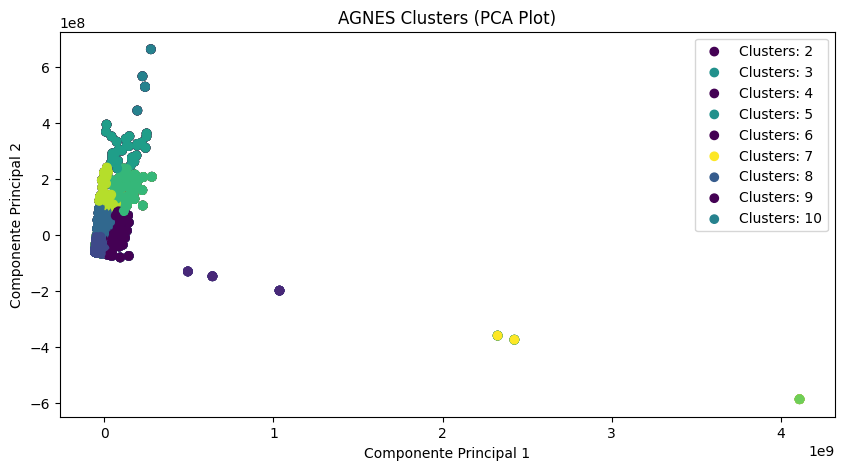

In [68]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import numpy as np

limite = 10
def agnes(dados, limite, escalonador=False):
    scores_agg_hierarchical = []

    for n_clusters in range(2, limite + 1):
        hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = hierarchical_clustering.fit_predict(imdb)
        scores_agg_hierarchical.append((n_clusters, cluster_labels))

    # Plota o gráfico de dispersão
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(imdb)

    plt.figure(figsize=(10, 5))
    for n_clusters, cluster_labels in scores_agg_hierarchical:
        plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', label=f'Clusters: {n_clusters}')

    plt.title('AGNES Clusters (PCA Plot)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend()
    plt.show()

# Exemplo de uso:
agnes(dados, limite)

Os clusters estão bem unidos e há poucos outliers, ou seja, o algoritmo de agrupamento funcionou bem para os dados e são coesos, levando em conta que para a análise foram considerados os filmes com avaliação imdb maior do que 7.0

In [78]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import numpy as np

n_clusters = 3
agnes2 = AgglomerativeClustering(n_clusters=n_clusters)

# Ajuste o modelo aos dados
cluster_labels = agnes2.fit_predict(imdb)

# Calcule o índice de Davies-Bouldin
db_score = davies_bouldin_score(imdb, cluster_labels)
print(f'Índice de Davies-Bouldin: {db_score}')

# Calcule o índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(imdb, cluster_labels)
print(f'Índice de Calinski-Harabasz: {ch_score}')

Índice de Davies-Bouldin: 0.5393738421653742
Índice de Calinski-Harabasz: 2307.302106035908


Não conseguimos calcular a inercia usando o algoritmo agnes, então vamos analisar as outras métricas:

**Índice de Davies-Bouldin**: O valor de 0.539 indica que os clusters são relativamente bem definidos e distintos, uma vez que o índice de Davies-Bouldin é baixo. Valores mais próximos de 0 sugerem clusters mais distintos, o que é positivo.

**Índice de Calinski-Harabasz**: O valor de 2307.30 sugere que os clusters são bem separados e compactos. O índice de Calinski-Harabasz tende a ser maior quando os clusters estão bem separados, o que é uma boa indicação da qualidade dos agrupamentos.

In [79]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances, accuracy_score, fowlkes_mallows_score
from sklearn.datasets import make_blobs

# métricas externas,
n_samples = 300
n_features = 2
n_clusters = 3
imdb, true_labels = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=0)

# Crie uma instância do modelo AgglomerativeClustering com o número de clusters correto
agnes = AgglomerativeClustering(n_clusters=n_clusters)

# Ajuste o modelo aos dados e obtenha os rótulos de cluster
cluster_labels = agnes.fit_predict(imdb)

# Calcular a pureza
def calculate_purity(cluster_labels, true_labels):
    n = len(cluster_labels)
    unique_clusters = np.unique(cluster_labels)
    total = 0
    for cluster in unique_clusters:
        cluster_indices = np.where(cluster_labels == cluster)
        cluster_true_labels = true_labels[cluster_indices]
        unique, counts = np.unique(cluster_true_labels, return_counts=True)
        majority_class_count = np.max(counts)
        total += majority_class_count
    purity = total / n
    return purity

purity = calculate_purity(cluster_labels, true_labels)
print(f'Pureza: {purity}')

# Calcular a taxa de erro (acurácia inversa)
accuracy = accuracy_score(true_labels, cluster_labels)
error_rate = 1 - accuracy
print(f'Taxa de Erro: {error_rate}')

# Calcular a pontuação Fowlkes-Mallows
fowlkes_mallows = fowlkes_mallows_score(true_labels, cluster_labels)
print(f'Pontuação Fowlkes-Mallows: {fowlkes_mallows}')

Pureza: 0.7966666666666666
Taxa de Erro: 0.20333333333333337
Pontuação Fowlkes-Mallows: 0.6936059748459275


**Pureza**: A pureza é uma métrica de avaliação externa que mede a qualidade dos clusters com base na correspondência com os rótulos verdadeiros ou conhecidos. Uma pureza de 0.7966 indica que, em média, 79.66% dos pontos de dados foram atribuídos ao cluster correto com base nos rótulos verdadeiros. Uma pureza mais alta é desejável, pois indica que os agrupamentos são consistentes com as classes conhecidas.

**Taxa de Erro**: A taxa de erro é a complementar da pureza e mede a proporção de pontos de dados que foram atribuídos ao cluster errado com base nos rótulos verdadeiros. Uma taxa de erro de 0.2033 indica que, em média, 20.33% dos pontos de dados foram atribuídos ao cluster errado. Uma taxa de erro mais baixa é desejável.

**Pontuação Fowlkes-Mallows**: A pontuação Fowlkes-Mallows é uma medida de avaliação externa que calcula a média geométrica da precisão e do recall (ou sensibilidade) dos clusters. Uma pontuação de 0.6936 sugere que os clusters têm um bom equilíbrio entre a precisão e o recall, o que é positivo. Uma pontuação Fowlkes-Mallows mais alta indica um melhor desempenho na correspondência com os rótulos verdadeiros.